In [3]:
import sys
import os
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt
path_to_video = 'W4LabData/Quadrangle.mov'
%matplotlib inline

##### Some useful/advanced opencv2 online resources on video processing (for your interests only):
https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_video_display/py_video_display.html

In [7]:
# Capture Video and represent it as a object
cap = cv2.VideoCapture(path_to_video)
# Check whether video is captured correctly by cv2
if not cap.isOpened():
    print('{} not opened'.format(path_to_video))
    sys.exit(1)
# Use cv2 to fetch three important variables
time_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
frame_width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
# Use for loop to have access to video frame by frame
while(1):
    return_flag, frame = cap.read()  
    if not return_flag:
        # return_flag=False when the video ends
        print('Video Reach End')
        break
        
    # Main Content - Start
    cv2.imshow('VideoWindowTitle-Quadrangle', frame)
    # Main Content - End
    
    # cv2.waitKey(30) - delay for 30 milliseconds and return a value to indicate whether this step is successful
    # 0xff == ord('q') - out of scope of this course. Don't worry.
    if cv2.waitKey(30) & 0xff == ord('q'):
        break
# Securely release video and close windows
cap.release()
cv2.destroyAllWindows()

Video Reach End


### A standard procedure to process video via Opencv

In [3]:
cap = cv2.VideoCapture(path_to_video)
if not cap.isOpened():
    print('{} not opened'.format(path_to_video))
    sys.exit(1)
time_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
frame_width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
while(1):
    return_flag, frame = cap.read()  
    if not return_flag:
        print('Video Reach End')
        break
        
    # Main Content - Start
    cv2.imshow('VideoWindowTitle-Quadrangle', frame)
    # Main Content - End

    if cv2.waitKey(30) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Video Reach End


### 4.2 Extract Frames from a Video

In [4]:
frame_save_path = './frames/'

In [5]:
def create_dir_if_not_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

In [6]:
cap = cv2.VideoCapture(path_to_video)
create_dir_if_not_exists(frame_save_path) # Or you can create it manully
if not cap.isOpened():
    print('{} not opened'.format(path_to_video))
    sys.exit(1)
time_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
frame_width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
frame_counter = 0                                             # FRAME_COUNTER
while(1):
    return_flag, frame = cap.read()  
    if not return_flag:
        print('Video Reach End')
        break
    # Main Content - Start
    cv2.imshow('VideoWindowTitle-Quadrangle', frame)
    cv2.imwrite(frame_save_path + 'frame%d.tif' % frame_counter, frame)
    frame_counter += 1
    # Main Content - End    
    if cv2.waitKey(30) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Video Reach End


### Convert Frame Sequence to Video

In [7]:
frame_load_path = './frames/'
path_to_output_video = './new_video.mov'

In [8]:
out = cv2.VideoWriter(path_to_output_video, cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 10, (int(frame_width), int(frame_height)))
frame_counter = 0
while(1):
    img = cv2.imread(frame_load_path + 'frame%d.tif' % frame_counter)
    if img is None:
        print('No more frames to be loaded')
        break;
    out.write(img)
    frame_counter += 1
out.release()
cv2.destroyAllWindows()

No more frames to be loaded


### 4.3 Video Compositing by Background Replacement

#### Setup

In [9]:
if not os.path.isdir(os.path.join(os.getcwd(), 'background')):
    os.mkdir("background")
else:
    print('background already exists')

if not os.path.isdir(os.path.join(os.getcwd(), 'composite')):
    os.mkdir("composite")
else:
    print('composite already exists')

cap = cv2.VideoCapture('W4LabData/Quadrangle.mov')
if not cap.isOpened():
    print('Quadrangle.mov not opened')
    sys.exit(1)
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
frame_width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
bgctr = length # The total number of background frames
count = 0

background already exists
composite already exists


#### 4.3.1 Extract frames from background video

In [10]:
################  TODO  #################
# Capture the frames from 'Quadrangle.mov' and store in
# 'background' folder

cap = cv2.VideoCapture(path_to_video)
create_dir_if_not_exists('./background/') # Or you can create it manully
if not cap.isOpened():
    print('{} not opened'.format(path_to_video))
    sys.exit(1)
time_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
frame_width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
frame_counter = 0                                             # FRAME_COUNTER
while(1):
    return_flag, frame = cap.read()  
    if not return_flag:
        print('Video Reach End')
        break
    # Main Content - Start
    cv2.imshow('VideoWindowTitle-Quadrangle', frame)
    cv2.imwrite('./background/' + 'frame%d.tif' % frame_counter, frame)
    frame_counter += 1
    # Main Content - End    
    if cv2.waitKey(30) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Video Reach End


#### 4.3.2 Composite contents from both videos

In [11]:
BLUE = 120
bgctr = length
count = 0
cap = cv2.VideoCapture('W4LabData/monkey.avi')
if not cap.isOpened():
    print('monkey.avi not opened')
    sys.exit(1)
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
frame_width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
while(1):
    ret, monkeyframe = cap.read()
    #resize the monkey image to background size
    monkeyframe = cv2.resize(monkeyframe, (320, 240))
    if not ret:
        break
    bg = cv2.imread('background/frame%d.tif' % (count%bgctr))
    if bg is None:
        print('ooops! no bg found BG/frame%d.tif' % (count%bgctr))
        break
    # overwrite the background
    for x in range(monkeyframe.shape[0]):
        for y in range(monkeyframe.shape[1]):
            ################  TODO  #################
            # replace the corresponding pixels in 'Quadrangle.mov' with 
             # non-blue pixels in 'monkey.avi'
            
            #check if the pixel's blue channel is 'blue'
            #openCV use B,G,R
            if monkeyframe[x,y][0] <= BLUE: 
            
            #the pixel is not blue, continue the overwriting
            
                bg[x, y] = monkeyframe[x, y]
            
            #########################################
    cv2.imwrite('composite/composite%d.tif' % count, bg)
    cv2.putText(img=bg, text='Compositing: %d%%' % int(100*count/length), org=(int(0), int(bg.shape[1] / 2)),
                fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=0.7,
                color=(0, 255, 0))
    cv2.imshow('Monkey in Quadrangle', bg)

    count += 1
    if cv2.waitKey(30) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3718: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


#### Convert the composited frame sequence into video

In [8]:
################  TODO  #################
# Read the composited frames from 'composite' folder
# and covert them into a single output video
frame_load_path = './composite/'
path_to_output_video = './new_video.mov'

out = cv2.VideoWriter(path_to_output_video, cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 10, (int(frame_width), int(frame_height)))
frame_counter = 0
while(1):
    img = cv2.imread(frame_load_path + 'composite%d.tif' % frame_counter)
    if img is None:
        print('No more frames to be loaded')
        break;
    out.write(img)
    frame_counter += 1
out.release()
cv2.destroyAllWindows()


No more frames to be loaded


### Video Compositing by Background Replacement - Week4 Lab Exercise Submission
You can now use the generate_results() function below to generate your outputs for submission. 

In [4]:
'''
    generate_results function is a helper function for you to generate
    the output images of lab exercise submission
    - Function Input: 
            -            wk:           int, indicates a specific week's lab exercise
            -          name:           str, the name of the student
            -           SID:           int, the SID of the student
            -  output_video:           str, the path to output_video

    - Function Usage:
            - Supply all the arguments with the correct types and a result image
              will be generated.
    - Tips:
            - You can right click the result image plot to save the image or 
              you can take a screenshoot for the submission.
'''
def generate_results(wk, name, SID, output_video):
    cap = cv2.VideoCapture(output_video)
    random_frames = []
    if not cap.isOpened():
        print('%s not opened' % output_video.split('/')[-1])
        sys.exit(1)

    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    x = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    y = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    while x > 10:
        x /= (x / 10)
        y /= (y / 10)
    
    for i in range(3):
        random_frames.append(random.randint(1, frame_count))
        
    fig, axs = plt.subplots(1, 3, figsize=(x,y))
        
    count = 0
    output_count = 0
    while(1):
        ret, frame = cap.read()
        if not ret:
            break
        if count in random_frames:
            frame_m = frame.copy()
            frame_R = frame[:,:,2]
            frame_B = frame[:,:,0]
            frame_m[:,:,2] = frame_B
            frame_m[:,:,0] = frame_R
            frame = np.uint8(frame_m)

            axs[output_count].imshow(frame_m)
            axs[output_count].text(0.5,-0.1, 'Composite frame: ' + str(count), size=12, ha="center", transform=axs[output_count].transAxes)
            axs[output_count].axis('off')
            output_count+=1
            
            if output_count >= 3:
                break
        count+=1

    cap.release()
    cv2.destroyAllWindows()
    fig.suptitle("Week %i Lab Exercise\n %s SID:%i"%(wk, name, SID),x=0.5,y=0.75)
    plt.tight_layout()
    plt.show()

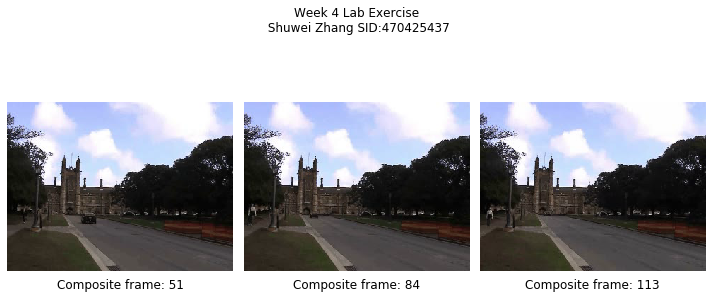

In [5]:
# Change the 'path_to_output' to the path where your composited video is located
path_to_output = ''
generate_results(4, 'Shuwei Zhang', 470425437, './new_video.mov')